In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
df = pd.read_json("synopsys_results.json")

## Multiplication

In [3]:
mul_df = df.query('Design == "exact_mul" | Design == "approx_mul"')
mul_df.head()

,Design,Bits,Freq.,Area,Power,Delay,Energy,ADP
0,exact_mul,32,0,7468.305652,14.1893,3.46,49094.978,25840.337556
1,exact_mul,32,50,7544.980847,14.7204,3.53,51963.012,26633.782390
2,exact_mul,32,100,7544.980847,14.7204,3.53,51963.012,26633.782390
3,exact_mul,32,150,7544.980847,14.7169,3.53,51950.657,26633.782390
4,exact_mul,32,200,7544.980847,14.7186,3.53,51956.658,26633.782390


In [4]:
# Remove non-constrained case and violation of timing constraint
mul_df = mul_df[mul_df["Freq."]!=0]
mul_df = mul_df[mul_df["Delay"] <= round(1000/mul_df["Freq."], 2)]

In [5]:
area_df = mul_df[["Area", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
power_df = mul_df[["Power", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
delay_df = mul_df[["Delay", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
energy_df = mul_df[["Energy", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
ADP_df = mul_df[["ADP", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)

area_df.head()

Area             
Design    exact_mul   approx_mul
Freq.                           
50      7544.980847  2210.879992
100     7544.980847  2210.879992
150     7544.980847  2210.879992
200     7544.980847  2210.879992
250     7544.980847  2210.879992

In [6]:
# # Percentage gain and loss
# area_gain = 100 * area_df['Area']['approx_mul'] / area_df['Area']['exact_mul']
# power_gain = 100 * power_df['Power']['approx_mul'] / power_df['Power']['exact_mul']
# delay_gain = 100 * delay_df['Delay']['approx_mul'] / delay_df['Delay']['exact_mul']
# energy_gain = 100 * energy_df['Energy']['approx_mul'] / energy_df['Energy']['exact_mul']
# adp_gain = 100 * ADP_df['ADP']['approx_mul'] / ADP_df['ADP']['exact_mul']

# X times reduction
area_gain = area_df['Area']['exact_mul'] / area_df['Area']['approx_mul']
power_gain = power_df['Power']['exact_mul'] / power_df['Power']['approx_mul']
delay_gain = delay_df['Delay']['exact_mul'] / delay_df['Delay']['approx_mul']
energy_gain = energy_df['Energy']['exact_mul'] / energy_df['Energy']['approx_mul']
adp_gain = ADP_df['ADP']['exact_mul'] / ADP_df['ADP']['approx_mul']

energy_gain

Freq.
50      4.659355
100     4.659355
150     4.657841
200     4.658379
250     4.666823
300     4.153441
350     5.163573
400     5.287241
450     6.005293
500     6.940681
550     8.141987
600          NaN
650          NaN
700          NaN
750          NaN
800          NaN
850          NaN
900          NaN
950          NaN
1000         NaN
1100         NaN
1150         NaN
dtype: float64

<Figure size 1000x500 with 0 Axes>

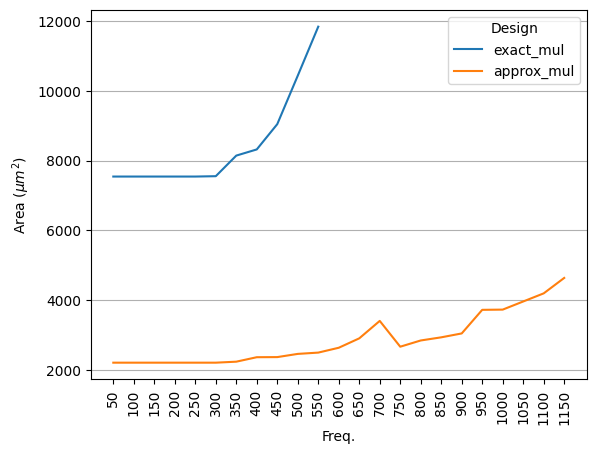

In [7]:
fig=plt.figure(figsize=(10,5))

ax1 = area_df.plot.line(
	y="Area",
	rot = 0,
	ylabel="Area ($\mu m^2$)",
)
ax1.set_xticks(range(50,1200,50))
ax1.tick_params(axis='x', labelrotation=90)
# ax1.set_xlim(50)
# ax1.set_ylim(0)


# ax2 = ax1.twinx()

# ax2 = area_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='lower right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

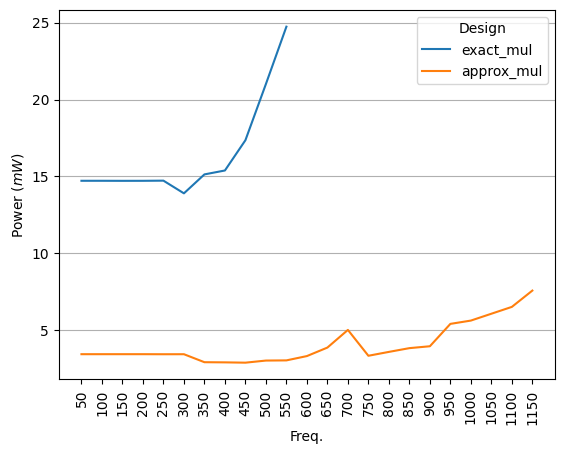

In [8]:
fig=plt.figure(figsize=(10,5))

ax1=power_df.plot.line(
	y="Power",
	rot = 0,
	ylabel="Power ($mW$)"
)
ax1.set_xticks(range(50,1200,50))
ax1.tick_params(axis='x', labelrotation=90)
# ax1.set_xlim(50)
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = power_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='lower right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

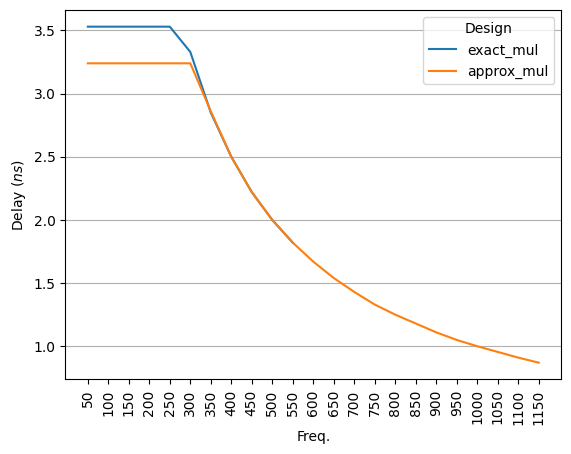

In [9]:
fig=plt.figure(figsize=(10,5))

ax1=delay_df.plot.line(
	y="Delay",
	rot = 0,
	ylabel="Delay ($ns$)"
)
ax1.set_xticks(range(50,1200,50))
ax1.tick_params(axis='x', labelrotation=90)
# ax1.set_xlim(50)
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = delay_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='best')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

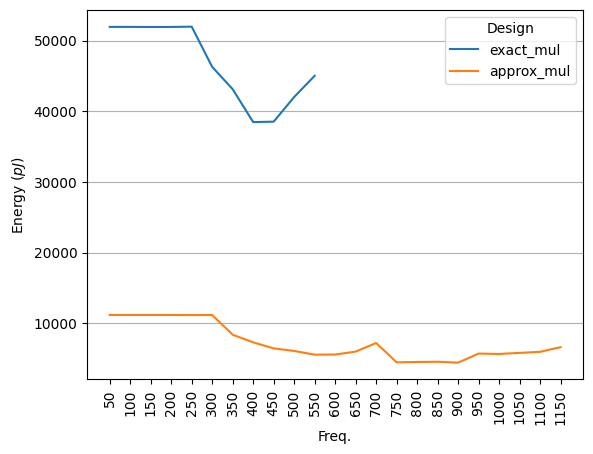

In [10]:
fig=plt.figure(figsize=(10,5))

ax1=energy_df.plot.line(
    y="Energy",
    rot = 0,
    ylabel="Energy ($pJ$)"
)
ax1.set_xticks(range(50,1200,50))
ax1.tick_params(axis='x', labelrotation=90)
# ax1.set_xlim(50)
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = energy_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='best')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

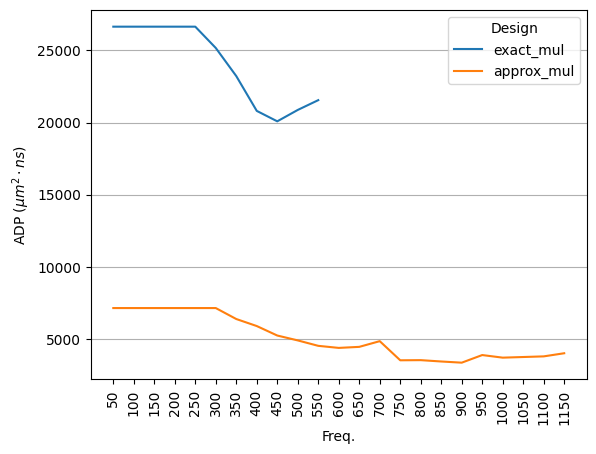

In [11]:
fig=plt.figure(figsize=(10,5))

ax1=ADP_df.plot.line(
	y="ADP",
	rot = 0,
	ylabel="ADP ($\mu m^2 \cdot ns$)",
)
ax1.set_xticks(range(50,1200,50))
ax1.tick_params(axis='x', labelrotation=90)
# ax1.set_xlim(50)
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = adp_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='center right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

## Division

In [12]:
div_df = df.query('Design == "exact_div" | Design == "approx_div"')
div_df.head()

,Design,Bits,Freq.,Area,Power,Delay,Energy,ADP
25,exact_div,32,0,10349.740784,25.7478,27.61,710896.758,285756.343046
26,exact_div,32,50,12196.060889,30.8490,20.00,616980.000,243921.217780
27,exact_div,32,100,17417.736080,42.3292,8.59,363607.828,149618.352927
28,exact_div,32,150,18657.475294,38.8281,6.66,258595.146,124258.785458
29,exact_div,32,200,26576.659447,63.2516,5.15,325745.740,136869.796152


In [13]:
# Remove non-constrained case and violation of timing constraint
div_df = div_df[div_df["Freq."]!=0]
div_df = div_df[div_df["Delay"] <= round(1000/div_df["Freq."], 2)]

In [14]:
area_df = div_df[["Area", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
power_df = div_df[["Power", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
delay_df = div_df[["Delay", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
energy_df = div_df[["Energy", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
ADP_df = div_df[["ADP", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)

area_df.head()

Area             
Design     exact_div   approx_div
Freq.                            
50      12196.060889  2233.929592
100     17417.736080  2233.929592
150     18657.475294  2233.929592
200              NaN  2233.929592
250              NaN  2233.929592

In [15]:
# Percentage gain and loss
# area_gain = 100 * area_df['Area']['approx_div'] / area_df['Area']['exact_div']
# power_gain = 100 * power_df['Power']['approx_div'] / power_df['Power']['exact_div']
# delay_gain = 100 * delay_df['Delay']['approx_div'] / delay_df['Delay']['exact_div']
# energy_gain = 100 * energy_df['Energy']['approx_div'] / energy_df['Energy']['exact_div']
# adp_gain = 100 * ADP_df['ADP']['approx_div'] / ADP_df['ADP']['exact_div']

# X times reduction
area_gain = area_df['Area']['exact_div'] / area_df['Area']['approx_div']
power_gain = power_df['Power']['exact_div'] / power_df['Power']['approx_div']
delay_gain = delay_df['Delay']['exact_div'] / delay_df['Delay']['approx_div']
energy_gain = energy_df['Energy']['exact_div'] / energy_df['Energy']['approx_div']
adp_gain = ADP_df['ADP']['exact_div'] / ADP_df['ADP']['approx_div']

energy_gain

Freq.
50      54.879370
100     32.342326
150     22.999630
200           NaN
250           NaN
300           NaN
350           NaN
400           NaN
450           NaN
500           NaN
550           NaN
600           NaN
650           NaN
700           NaN
750           NaN
800           NaN
850           NaN
900           NaN
950           NaN
1000          NaN
1100          NaN
1150          NaN
dtype: float64

<Figure size 1000x500 with 0 Axes>

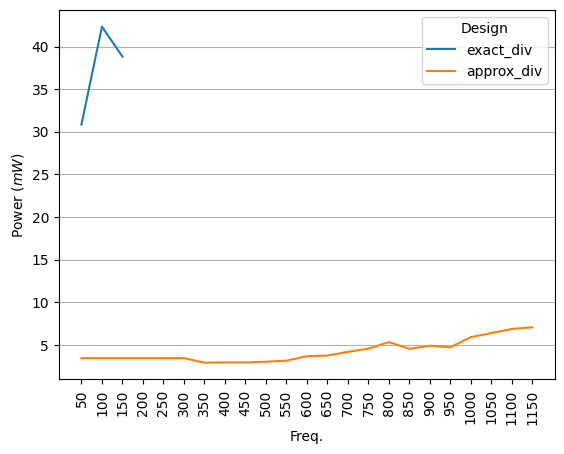

In [16]:
fig=plt.figure(figsize=(10,5))

ax1=power_df.plot.line(
	y="Power",
	rot = 0,
	ylabel="Power ($mW$)"
)
ax1.set_xticks(range(50,1200,50))
ax1.tick_params(axis='x', labelrotation=90)
# ax1.set_xlim(50)
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = power_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='lower right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

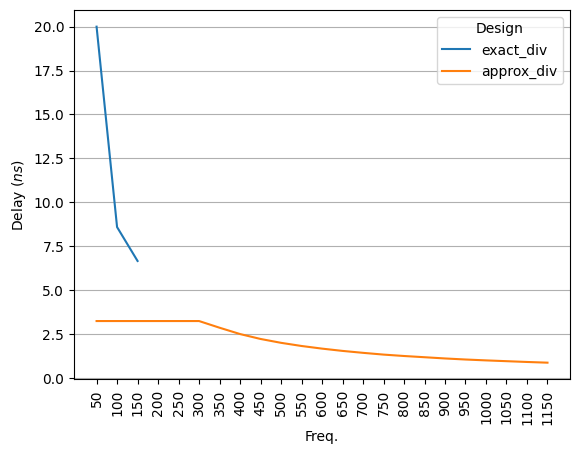

In [17]:
fig=plt.figure(figsize=(10,5))

ax1=delay_df.plot.line(
	y="Delay",
	rot = 0,
	ylabel="Delay ($ns$)"
)
ax1.set_xticks(range(50,1200,50))
ax1.tick_params(axis='x', labelrotation=90)
# ax1.set_xlim(50)
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = delay_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='best')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

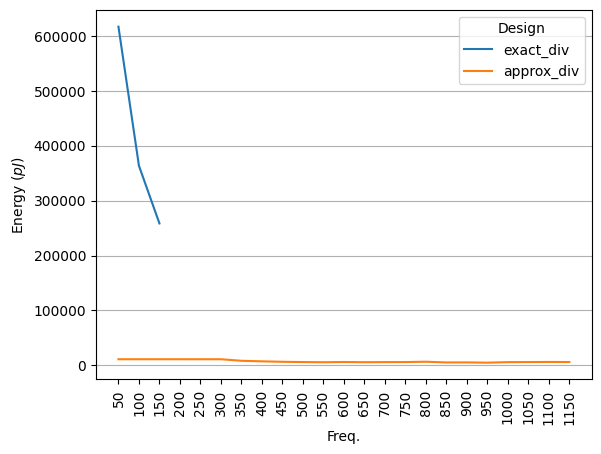

In [18]:
fig=plt.figure(figsize=(10,5))

ax1=energy_df.plot.line(
    y="Energy",
    rot = 0,
    ylabel="Energy ($pJ$)"
)
ax1.set_xticks(range(50,1200,50))
ax1.tick_params(axis='x', labelrotation=90)
# ax1.set_xlim(50)
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = energy_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='best')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

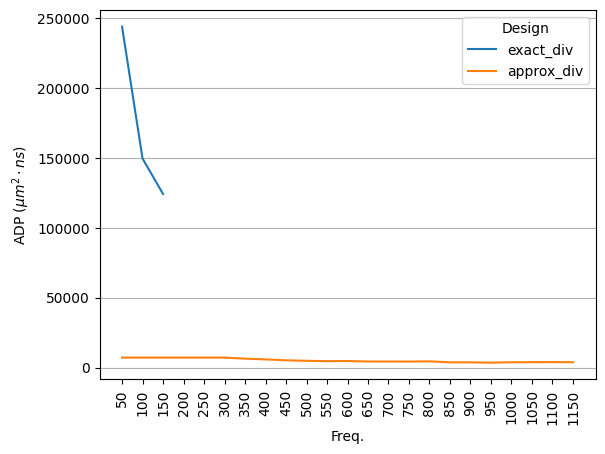

In [19]:
fig=plt.figure(figsize=(10,5))

ax1=ADP_df.plot.line(
	y="ADP",
	rot = 0,
	ylabel="ADP ($\mu m^2 \cdot ns$)",
)
ax1.set_xticks(range(50,1200,50))
ax1.tick_params(axis='x', labelrotation=90)
# ax1.set_xlim(50)
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = adp_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='center right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

## Square Root

In [20]:
sqrt_df = df.query('Design == "exact_sqrt" | Design == "approx_sqrt"')
sqrt_df.head()

,Design,Bits,Freq.,Area,Power,Delay,Energy,ADP
47,exact_sqrt,32,0,8066.184019,15.7474,13.84,217944.016,111635.986823
48,exact_sqrt,32,50,8038.900814,16.6224,13.17,218917.008,105872.323720
49,exact_sqrt,32,100,8964.883252,17.7411,10.00,177411.000,89648.832520
50,exact_sqrt,32,150,13460.966482,24.0539,6.12,147209.868,82381.114870
51,exact_sqrt,32,200,13667.707284,21.0610,5.00,105305.000,68338.536420


In [21]:
# Remove non-constrained case and violation of timing constraint
sqrt_df = sqrt_df[sqrt_df["Freq."]!=0]
sqrt_df = sqrt_df[sqrt_df["Delay"] <= round(1000/sqrt_df["Freq."], 2)]

In [22]:
area_df = sqrt_df[["Area", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
power_df = sqrt_df[["Power", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
delay_df = sqrt_df[["Delay", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
energy_df = sqrt_df[["Energy", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)
ADP_df = sqrt_df[["ADP", "Design", "Freq."]].groupby(["Design", "Freq."], sort=False).sum().unstack(0)

area_df.head()

Area             
Design    exact_sqrt  approx_sqrt
Freq.                            
50       8038.900814  1406.731193
100      8964.883252  1406.731193
150     13460.966482  1406.731193
200     13667.707284  1406.731193
250     15543.427333  1406.731193

In [23]:
# Percentage gain and loss
# area_gain = 100 * area_df['Area']['approx_sqrt'] / area_df['Area']['exact_sqrt']
# power_gain = 100 * power_df['Power']['approx_sqrt'] / power_df['Power']['exact_sqrt']
# delay_gain = 100 * delay_df['Delay']['approx_sqrt'] / delay_df['Delay']['exact_sqrt']
# energy_gain = 100 * energy_df['Energy']['approx_sqrt'] / energy_df['Energy']['exact_sqrt']
# adp_gain = 100 * ADP_df['ADP']['approx_sqrt'] / ADP_df['ADP']['exact_sqrt']

# X times reduction
area_gain = area_df['Area']['exact_sqrt'] / area_df['Area']['approx_sqrt']
power_gain = power_df['Power']['exact_sqrt'] / power_df['Power']['approx_sqrt']
delay_gain = delay_df['Delay']['exact_sqrt'] / delay_df['Delay']['approx_sqrt']
energy_gain = energy_df['Energy']['exact_sqrt'] / energy_df['Energy']['approx_sqrt']
adp_gain = ADP_df['ADP']['exact_sqrt'] / ADP_df['ADP']['approx_sqrt']


energy_gain

Freq.
50      49.424407
100     40.053688
150     33.223011
200     23.778229
250     23.426026
300           NaN
350           NaN
400           NaN
450           NaN
500           NaN
550           NaN
600           NaN
650           NaN
700           NaN
750           NaN
800           NaN
850           NaN
900           NaN
950           NaN
1000          NaN
1100          NaN
1150          NaN
dtype: float64

<Figure size 1000x500 with 0 Axes>

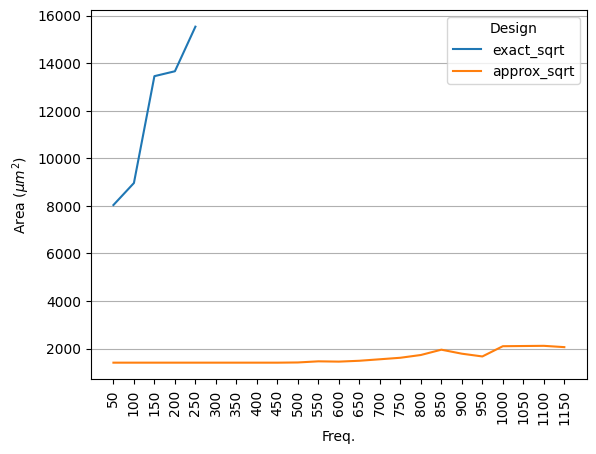

In [24]:
fig=plt.figure(figsize=(10,5))

ax1 = area_df.plot.line(
	y="Area",
	rot = 0,
	ylabel="Area ($\mu m^2$)",
)
ax1.set_xticks(range(50,1200,50))
ax1.tick_params(axis='x', labelrotation=90)
# ax1.set_xlim(50)
# ax1.set_ylim(0)


# ax2 = ax1.twinx()

# ax2 = area_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='lower right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

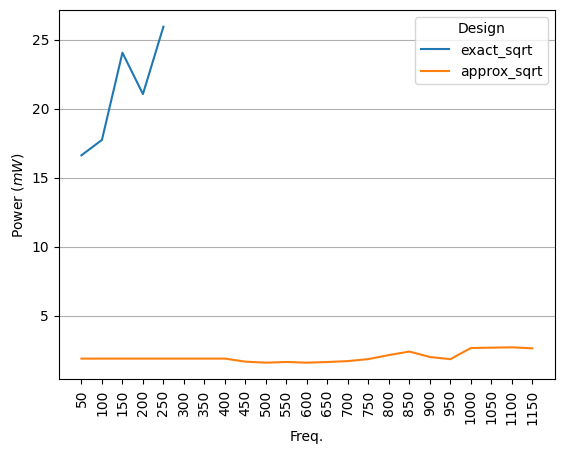

In [25]:
fig=plt.figure(figsize=(10,5))

ax1=power_df.plot.line(
	y="Power",
	rot = 0,
	ylabel="Power ($mW$)"
)
ax1.set_xticks(range(50,1200,50))
ax1.tick_params(axis='x', labelrotation=90)
# ax1.set_xlim(50)
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = power_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='lower right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

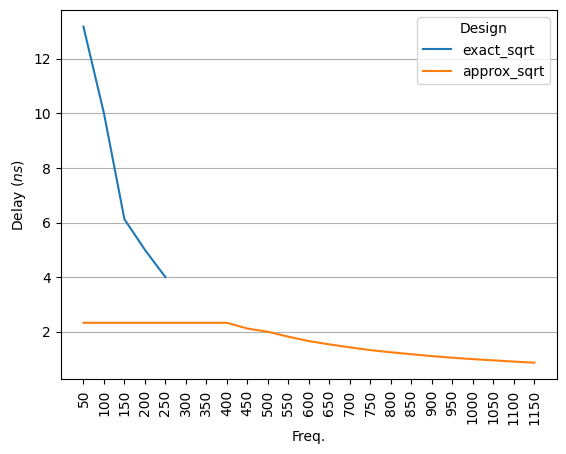

In [26]:
fig=plt.figure(figsize=(10,5))

ax1=delay_df.plot.line(
	y="Delay",
	rot = 0,
	ylabel="Delay ($ns$)"
)
ax1.set_xticks(range(50,1200,50))
ax1.tick_params(axis='x', labelrotation=90)
# ax1.set_xlim(50)
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = delay_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='best')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

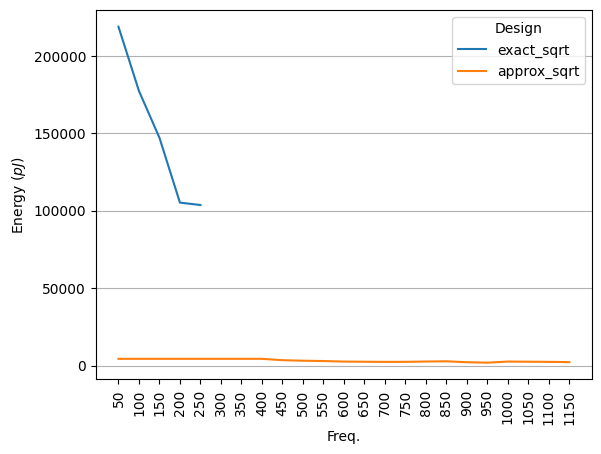

In [27]:
fig=plt.figure(figsize=(10,5))

ax1=energy_df.plot.line(
    y="Energy",
    rot = 0,
    ylabel="Energy ($pJ$)"
)
ax1.set_xticks(range(50,1200,50))
ax1.tick_params(axis='x', labelrotation=90)
# ax1.set_xlim(50)
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = energy_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='best')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()

<Figure size 1000x500 with 0 Axes>

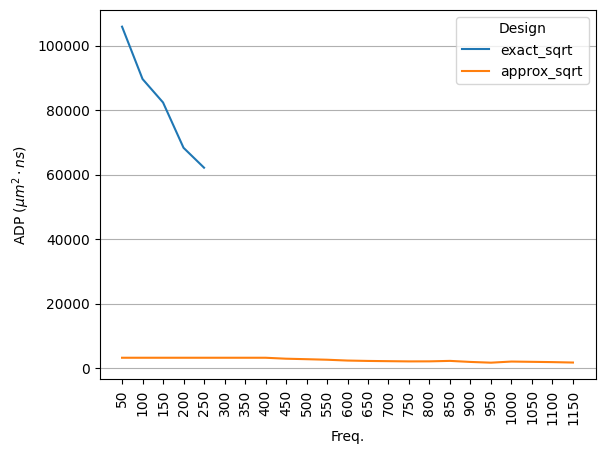

In [28]:
fig=plt.figure(figsize=(10,5))

ax1=ADP_df.plot.line(
	y="ADP",
	rot = 0,
	ylabel="ADP ($\mu m^2 \cdot ns$)",
)
ax1.set_xticks(range(50,1200,50))
ax1.tick_params(axis='x', labelrotation=90)
# ax1.set_xlim(50)
# ax1.set_ylim(0)

# ax2 = ax1.twinx()

# ax2 = adp_gain.plot.line(
# 	rot = 0,
# 	# ylabel="%",
# 	ax=ax2,
# 	color='g',
# 	label="Ratio (%)"
# )
# ax2.set_ylim(0)

# # Plot legends together
# ax1.legend_ = None
# handles,labels = [],[]
# for ax in [ax1, ax2]:
# 	for h,l in zip(*ax.get_legend_handles_labels()):
# 		handles.append(h)
# 		labels.append(l)
# plt.legend(handles, labels, loc='center right')

ax1.grid(True, axis="y")
# plt.grid(False, axis="x")
plt.show()